# **Import libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **Reading Data**

In [ ]:
df = pd.read_csv("Complaints.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 10415 non-null  object 
 1   OFFER_NAME              9122 non-null   object 
 2   CUSTOMER_TYPE           10415 non-null  object 
 3   CUSTOMER_GROUP          9067 non-null   object 
 4   CURRENT_STATUS          10415 non-null  object 
 5   ESCALATION_FLAG         10415 non-null  object 
 6   ESCALATED_GROUP         3360 non-null   object 
 7   OPEN_DATE               10415 non-null  object 
 8   OPEN_USER               10053 non-null  object 
 9   CLOSE_DATE              10296 non-null  object 
 10  CLOSE_GROUP             5525 non-null   object 
 11  CLOSE_USER              9899 non-null   object 
 12  AGE_BRACKET             10296 non-null  float64
 13  ACTUAL_COMPLAINT        10415 non-null  object 
 14  CALLBACK_MECHANISM      3138 non-null 

In [4]:
df.describe()

,AGE_BRACKET
count,10296.000000
mean,1.503302
std,2.978144
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,116.000000


# **Preprocessing**

In [5]:
df.isnull().sum()

,0
CASE_ID,0
OFFER_NAME,1293
CUSTOMER_TYPE,0
CUSTOMER_GROUP,1348
CURRENT_STATUS,0
ESCALATION_FLAG,0
ESCALATED_GROUP,7055
OPEN_DATE,0
OPEN_USER,362
CLOSE_DATE,119


In [6]:
df.drop(labels = ["ESCALATED_GROUP", "CALLBACK_MECHANISM", "RESOLUTION", "RESOLUTION_DESCRIPTION",
                  "CASE_DESC", "CLOSE_DATE", "OPEN_DATE", "CASE_ID"], axis = 1, inplace = True)

In [ ]:
df['AGE_BRACKET'].fillna(df['AGE_BRACKET'].mean(), inplace = True)

In [ ]:
df['OFFER_NAME'].fillna('unknown', inplace = True)

df['CUSTOMER_GROUP'].fillna('unknown', inplace = True)

df['CLOSE_GROUP'].fillna('unknown', inplace = True)

df['CLOSE_USER'].fillna('unknown', inplace = True)

df['OPEN_GR'].fillna('unknown', inplace = True)

df['OPEN_USER'].fillna('unknown', inplace = True)

In [9]:
df.isnull().sum()

,0
OFFER_NAME,0
CUSTOMER_TYPE,0
CUSTOMER_GROUP,0
CURRENT_STATUS,0
ESCALATION_FLAG,0
OPEN_USER,0
CLOSE_GROUP,0
CLOSE_USER,0
AGE_BRACKET,0
ACTUAL_COMPLAINT,0


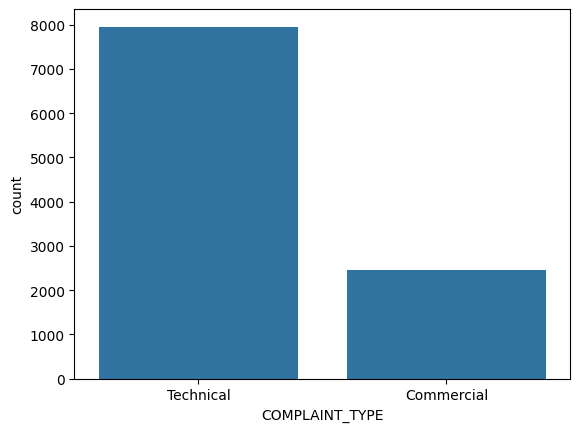

In [10]:
sns.countplot(x='COMPLAINT_TYPE', data=df)
plt.show()

In [11]:
df.columns

Index(['OFFER_NAME', 'CUSTOMER_TYPE', 'CUSTOMER_GROUP', 'CURRENT_STATUS',
       'ESCALATION_FLAG', 'OPEN_USER', 'CLOSE_GROUP', 'CLOSE_USER',
       'AGE_BRACKET', 'ACTUAL_COMPLAINT', 'OPEN_GR', 'COMPLAINT_TYPE',
       'PRODUCT', 'CASE'],
      dtype='object')

In [12]:
c = df.select_dtypes(['object']).columns
c


Index(['OFFER_NAME', 'CUSTOMER_TYPE', 'CUSTOMER_GROUP', 'CURRENT_STATUS',
       'ESCALATION_FLAG', 'OPEN_USER', 'CLOSE_GROUP', 'CLOSE_USER',
       'ACTUAL_COMPLAINT', 'OPEN_GR', 'COMPLAINT_TYPE', 'PRODUCT', 'CASE'],
      dtype='object')

In [13]:
le = LabelEncoder()
df[c] = df[c].apply(LabelEncoder().fit_transform)
df

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_USER,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,1,1,55,19,57,2.0,0,10,1,0,4
1,140,0,73,1,1,249,28,78,1.0,1,17,0,1,0
2,9,0,70,1,0,166,10,165,1.0,2,2,1,0,4
3,24,0,16,1,0,155,46,152,1.0,2,18,1,0,4
4,24,0,16,1,0,110,10,108,1.0,2,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,60,0,54,1,0,10,46,20,1.0,2,18,0,1,0
10411,24,0,16,1,0,12,46,23,1.0,2,2,1,0,4
10412,22,1,14,1,0,263,10,283,1.0,2,2,1,0,4
10413,9,0,70,1,0,18,10,28,1.0,2,2,1,0,4


In [14]:
y = df["COMPLAINT_TYPE"]
x = df.drop(["COMPLAINT_TYPE", "OPEN_USER", "OPEN_GR", "CLOSE_USER", "CLOSE_GROUP"], axis = 1)

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [17]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# **ML Models**

**KNN**

In [18]:
numSplits = 5
kfold = StratifiedKFold(n_splits=numSplits, shuffle=True, random_state=1024)
print(kfold)

nList = [i for i in range(2, 10)]
train_scores, test_scores = [], []
avg_precision, avg_recall, avg_f1 = [], [], []

for n in nList:
    print('\nn neighbors:', n)
    trainFoldScoreList = []
    testFoldScoreList = []
    precisionList, recallList, f1List = [], [], []

    for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
        print('\tfold:', i)
        knn = KNeighborsClassifier(n_neighbors=n)

        knn.fit(x_train, y_train)

        train_yhat = knn.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        print('\t\ttrain_acc:', train_acc)

        test_yhat = knn.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        print('\t\ttest_acc:', test_acc)

        prec = precision_score(y_test, test_yhat)
        rec = recall_score(y_test, test_yhat)
        f1 = f1_score(y_test, test_yhat)

        trainFoldScoreList.append(train_acc)
        testFoldScoreList.append(test_acc)
        precisionList.append(prec)
        recallList.append(rec)
        f1List.append(f1)

    avgTrainAccuracy = np.mean(trainFoldScoreList)
    avgTestAccuracy = np.mean(testFoldScoreList)
    avgPrecision = np.mean(precisionList)
    avgRecall = np.mean(recallList)
    avgF1 = np.mean(f1List)

    print("\tAvg train Accuracy:", avgTrainAccuracy)
    print("\tAvg test Accuracy:", avgTestAccuracy)
    print("\tAvg Precision:", avgPrecision)
    print("\tAvg Recall:", avgRecall)
    print("\tAvg F1-score:", avgF1)

    train_scores.append(avgTrainAccuracy)
    test_scores.append(avgTestAccuracy)
    avg_precision.append(avgPrecision)
    avg_recall.append(avgRecall)
    avg_f1.append(avgF1)

StratifiedKFold(n_splits=5, random_state=1024, shuffle=True)

n neighbors: 2
	fold: 0
		train_acc: 0.9938370846730975
		test_acc: 0.984
	fold: 1
		train_acc: 0.9938370846730975
		test_acc: 0.984
	fold: 2
		train_acc: 0.9938370846730975
		test_acc: 0.984
	fold: 3
		train_acc: 0.9938370846730975
		test_acc: 0.984
	fold: 4
		train_acc: 0.9938370846730975
		test_acc: 0.984
	Avg train Accuracy: 0.9938370846730976
	Avg test Accuracy: 0.984
	Avg Precision: 0.9948453608247423
	Avg Recall: 0.9838572642310959
	Avg F1-score: 0.9893208030756087

n neighbors: 3
	fold: 0
		train_acc: 0.9944623079671311
		test_acc: 0.98688
	fold: 1
		train_acc: 0.9944623079671311
		test_acc: 0.98688
	fold: 2
		train_acc: 0.9944623079671311
		test_acc: 0.98688
	fold: 3
		train_acc: 0.9944623079671311
		test_acc: 0.98688
	fold: 4
		train_acc: 0.9944623079671311
		test_acc: 0.98688
	Avg train Accuracy: 0.9944623079671311
	Avg test Accuracy: 0.98688
	Avg Precision: 0.9927567106945038
	Avg Recall: 0.989804587935429
	Avg F

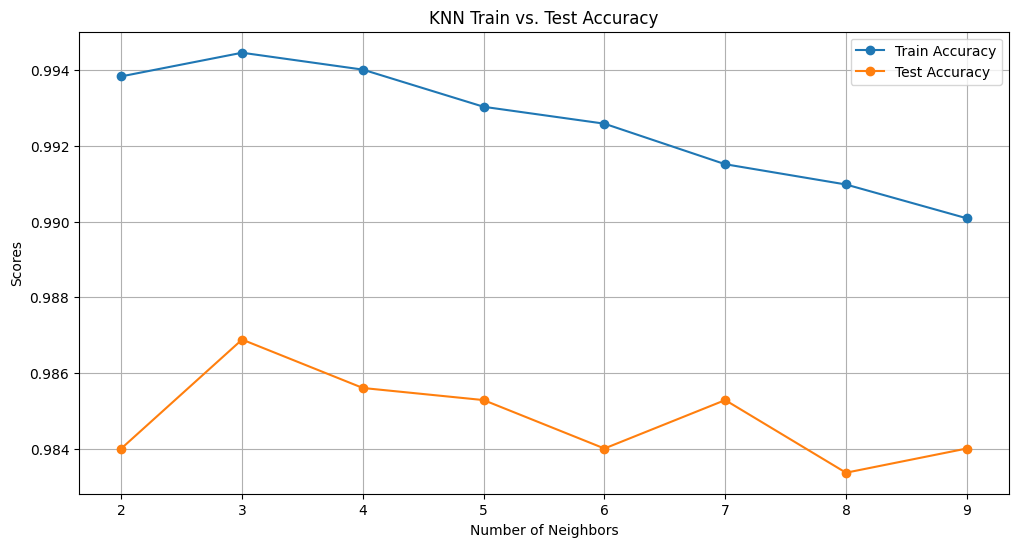

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(nList, train_scores, '-o', label='Train Accuracy')
plt.plot(nList, test_scores, '-o', label='Test Accuracy')
plt.legend()
plt.title("KNN Train vs. Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_acc = []
knn_rec = []
knn_pre = []
knn_f1 = []

for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
  for i in range(30):
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    knn_acc.append(acc)

    rec = recall_score(y_test, y_pred)
    knn_rec.append(rec)

    pre = precision_score(y_test, y_pred)
    knn_pre.append(pre)

    f1 = f1_score(y_test, y_pred)
    knn_f1.append(f1)


**Logisitic Regresion**

In [22]:
lr = LogisticRegression()

In [23]:
lr_acc = []
lr_pre = []
lr_rec = []
lr_f1 = []
for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
  for q in range(30):

    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    acc1 = accuracy_score(y_test, y_pred)
    lr_acc.append(acc1)

    rec1 = recall_score(y_test, y_pred)
    lr_rec.append(rec1)

    pre1 = precision_score(y_test, y_pred)
    lr_pre.append(pre1)

    f1_1 = f1_score(y_test, y_pred)
    lr_f1.append(f1_1)

**Decison Tree**

In [24]:
dec = DecisionTreeClassifier()

In [25]:
dec_acc = []
dec_rec = []
dec_pre = []
dec_f1 = []

for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
  for w in range(30):

    dec.fit(x_train, y_train)
    y_pred = dec.predict(x_test)

    acc2 = accuracy_score(y_test, y_pred)
    dec_acc.append(acc2)

    rec2 = recall_score(y_test, y_pred)
    dec_rec.append(rec2)

    pre2 = precision_score(y_test, y_pred)
    dec_pre.append(pre2)

    f1_2 = f1_score(y_test, y_pred)
    dec_f1.append(f1_2)

**Naive Bayes**

In [26]:
gnb = GaussianNB()

In [27]:
gnb_acc = []
gnb_rec = []
gnb_pre = []
gnb_f1 = []

for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
  for l in range(30):

    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)

    acc4 = accuracy_score(y_test, y_pred)
    gnb_acc.append(acc4)

    rec4 = recall_score(y_test, y_pred)
    gnb_rec.append(rec4)

    pre4 = precision_score(y_test, y_pred)
    gnb_pre.append(pre4)

    f1_4 = f1_score(y_test, y_pred)
    gnb_f1.append(f1_4)

# **Calculation and Visualization**

In [34]:
print("KNN_7 acc:", sum(knn_acc)/len(knn_acc))

print("LR acc:", sum(lr_acc)/len(lr_acc))

print("DT acc:", sum(dec_acc)/len(dec_acc))

print("NB acc:", sum(gnb_acc)/len(gnb_acc))


KNN_7 acc: 0.9852800000000004
LR acc: 0.9875200000000008
DT acc: 0.9860287999999986
NB acc: 0.9811200000000018


In [35]:
print("KNN_7 rec:", sum(knn_rec)/len(knn_rec))

print("LR rec:", sum(lr_rec)/len(lr_rec))

print("DT rec:", sum(dec_rec)/len(dec_rec))

print("NB rec:", sum(gnb_rec)/len(gnb_rec))

KNN_7 rec: 0.9885301614273586
LR rec: 0.9940526762956667
DT rec: 0.9883460775984139
NB rec: 0.9851316907391665


In [36]:
print("KNN_7 pre:", sum(knn_pre)/len(knn_pre))

print("LR pre:", sum(lr_pre)/len(lr_pre))

print("DT pre:", sum(dec_pre)/len(dec_pre))

print("NB pre:", sum(gnb_pre)/len(gnb_pre))

KNN_7 pre: 0.9919011082693915
LR pre: 0.9894291754756896
DT pre: 0.9930737764360438
NB pre: 0.9897567221510881


In [37]:
print("KNN_7 f1:", sum(knn_f1)/len(knn_f1))

print("LR f1:", sum(lr_f1)/len(lr_f1))

print("DT f1:", sum(dec_f1)/len(dec_f1))

print("NB f1:", sum(gnb_f1)/len(gnb_f1))

KNN_7 f1: 0.9902127659574474
LR f1: 0.9917355371900832
DT f1: 0.9907042264892487
NB f1: 0.9874387907174772


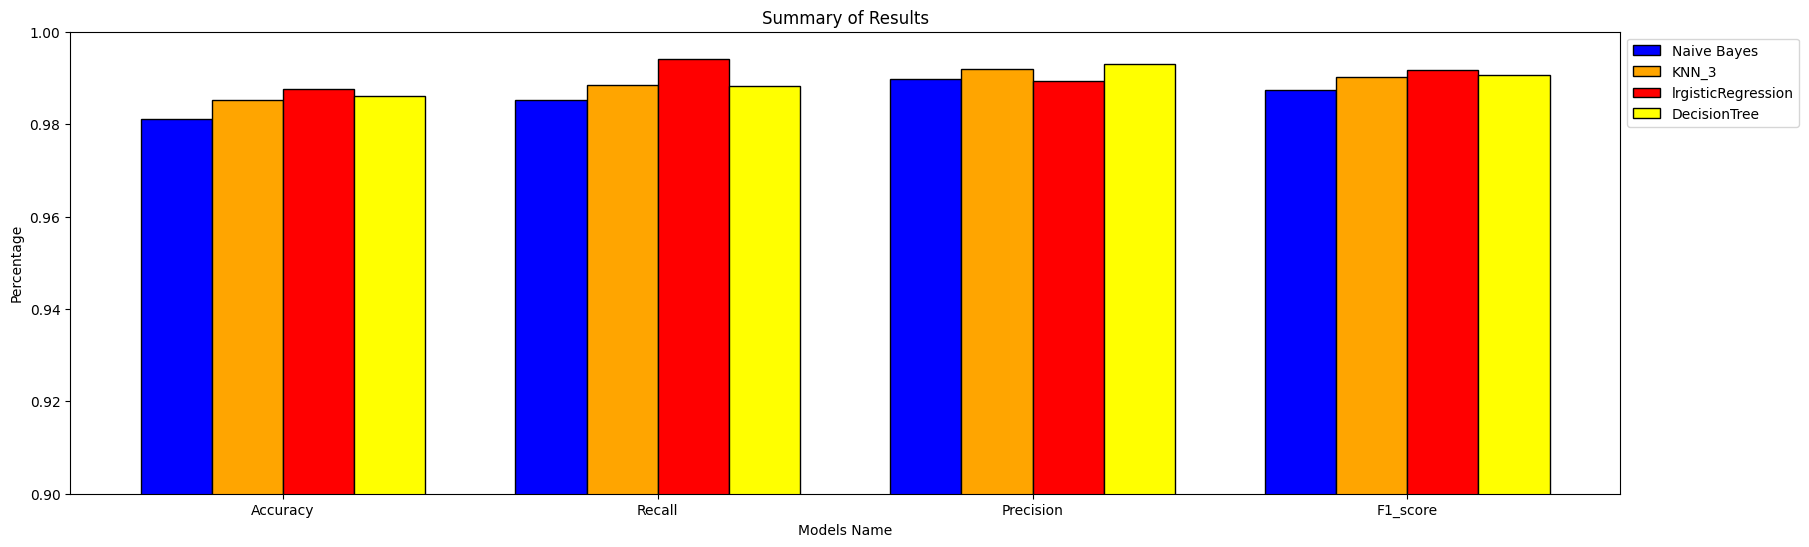

In [38]:
x_ax = ('Accuracy', 'Recall', 'Precision', 'F1_score')

gn = (sum(gnb_acc) / len(gnb_acc), sum(gnb_rec) / len(gnb_rec), sum(gnb_pre) / len(gnb_pre), sum(gnb_f1) / len(gnb_f1))

knn_3 = (sum(knn_acc) / len(knn_acc), sum(knn_rec) / len(knn_rec), sum(knn_pre) / len(knn_pre), sum(knn_f1) / len(knn_f1))

lrg = (sum(lr_acc) / len(lr_acc), sum(lr_rec) / len(lr_rec), sum(lr_pre) / len(lr_pre), sum(lr_f1) / len(lr_f1))

dect = (sum(dec_acc) / len(dec_acc), sum(dec_rec) / len(dec_rec), sum(dec_pre) / len(dec_pre), sum(dec_f1) / len(dec_f1))

plt.figure(figsize=(20, 6))

X_axis = np.arange(len(x_ax))

plt.bar(X_axis + 0.15, gn, color ='blue',width = 0.19,edgecolor = 'black',label = 'Naive Bayes')

plt.bar(X_axis + 0.34, knn_3, color ='orange',width = 0.19,edgecolor = 'black',label = 'KNN_3')

plt.bar(X_axis + 0.53, lrg, color ='red',width = 0.19,edgecolor = 'black',label = 'lrgisticRegression')

plt.bar(X_axis + 0.72, dect, color ='yellow',width = 0.19,edgecolor = 'black',label = 'DecisionTree')

plt.ylim(0.9, 1)
plt.xticks(X_axis+0.435, x_ax)
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Models Name")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()


<Figure size 1000x500 with 0 Axes>

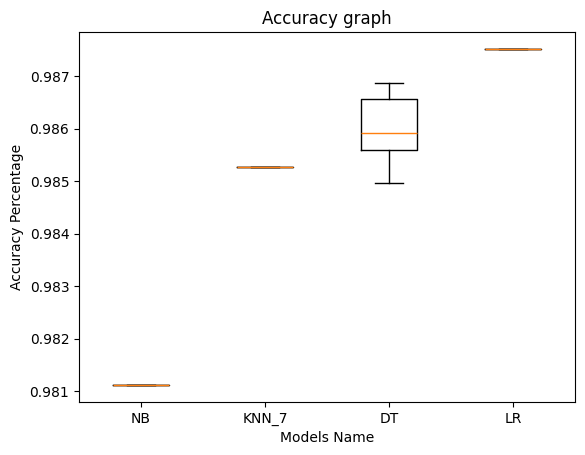

In [39]:
data_1 = np.array(gnb_acc)

data_2 = np.array(knn_acc)

data_3 = np.array(dec_acc)

data_4 = np.array(lr_acc)

dict1 = {'NB': data_1, 'KNN_7': data_2,'DT': data_3, 'LR': data_4}

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.boxplot(dict1.values())
ax.set_xticklabels(dict1.keys())
plt.xlabel("Models Name")
plt.ylabel("Accuracy Percentage")
plt.title("Accuracy graph")

plt.show()

<Figure size 1000x500 with 0 Axes>

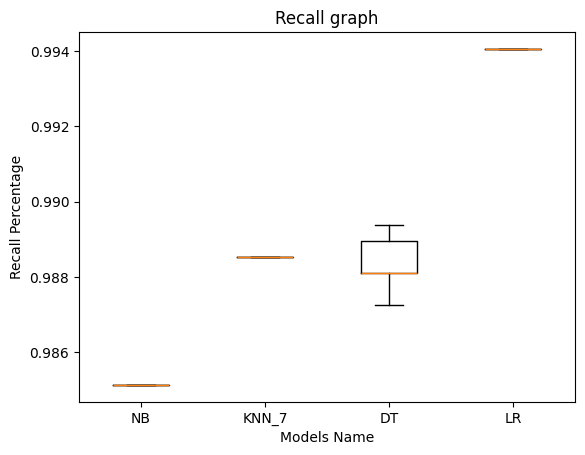

In [40]:
data_6 = np.array(gnb_rec)

data_7 = np.array(knn_rec)

data_8 = np.array(dec_rec)

data_9 = np.array(lr_rec)

dict2 = {'NB': data_6, 'KNN_7': data_7,'DT': data_8, 'LR': data_9}

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.boxplot(dict2.values())
ax.set_xticklabels(dict2.keys())
plt.xlabel("Models Name")
plt.ylabel("Recall Percentage")
plt.title("Recall graph")

plt.show()

<Figure size 1000x500 with 0 Axes>

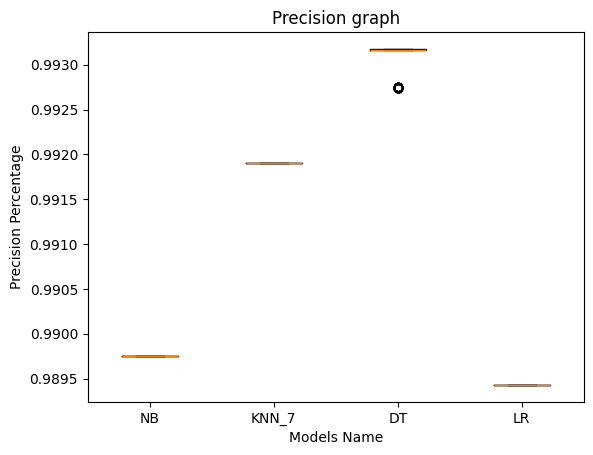

In [41]:
data_11 = np.array(gnb_pre)

data_12 = np.array(knn_pre)

data_13 = np.array(dec_pre)

data_14 = np.array(lr_pre)

dict3 = {'NB': data_11, 'KNN_7': data_12,'DT': data_13, 'LR': data_14}

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.boxplot(dict3.values())
ax.set_xticklabels(dict3.keys())
plt.xlabel("Models Name")
plt.ylabel("Precision Percentage")
plt.title("Precision graph")

plt.show()

<Figure size 1000x500 with 0 Axes>

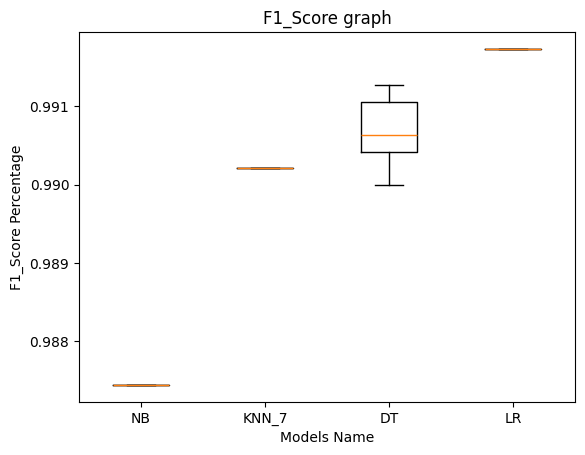

In [42]:
data_16 = np.array(gnb_f1)

data_17 = np.array(knn_f1)

data_18 = np.array(dec_f1)

data_19 = np.array(lr_f1)

dict4 = {'NB': data_16, 'KNN_7': data_17,'DT': data_18, 'LR': data_19}

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.boxplot(dict4.values())
ax.set_xticklabels(dict4.keys())
plt.xlabel("Models Name")
plt.ylabel("F1_Score Percentage")
plt.title("F1_Score graph")

plt.show()

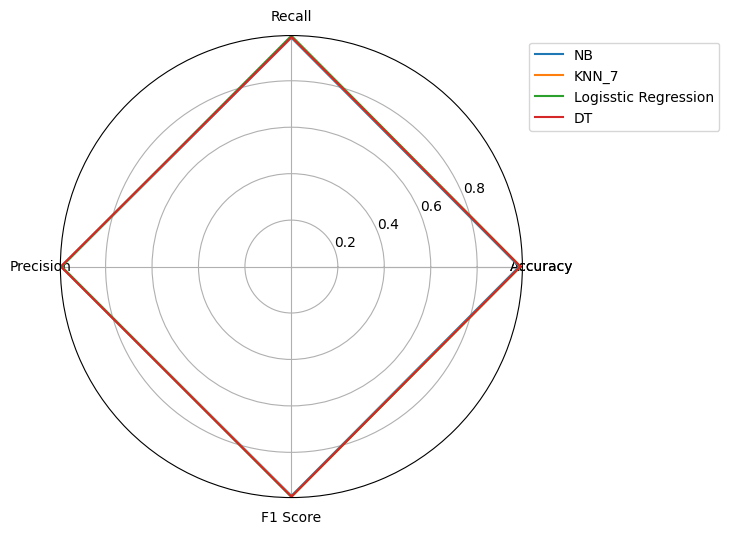

In [45]:
ca=['Accuracy','Recall','Precision','F1 Score']

gn1 = [sum(gnb_acc) / len(gnb_acc), sum(gnb_rec) / len(gnb_rec), sum(gnb_pre) / len(gnb_pre), sum(gnb_f1) / len(gnb_f1)]

knn_7_1 = [sum(knn_acc) / len(knn_acc), sum(knn_rec) / len(knn_rec), sum(knn_pre) / len(knn_pre), sum(knn_f1) / len(knn_f1)]

log1 = [sum(lr_acc) / len(lr_acc), sum(lr_rec) / len(lr_rec), sum(lr_pre) / len(lr_pre), sum(lr_f1) / len(lr_f1)]

dect1 = [sum(dec_acc) / len(dec_acc), sum(dec_rec) / len(dec_rec), sum(dec_pre) / len(dec_pre), sum(dec_f1) / len(dec_f1)]

angles = np.linspace(start=0, stop=2 * np.pi, num=len(gn1), endpoint=False)

gn1.append(gn1[0])

knn_7_1.append(knn_7_1[0])

log1.append(log1[0])

dect1.append(dect1[0])

ca.append(ca[0])

angles=np.concatenate((angles,[angles[0]]))

plt.figure(figsize=(6, 6))

plt.subplot(polar=True)

plt.plot(angles, gn1, label='NB')

plt.plot(angles, knn_7_1, label='KNN_7')

plt.plot(angles, log1, label='Logisstic Regression')

plt.plot(angles, dect1, label='DT')

plt.thetagrids(np.degrees(angles), labels=ca)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()